<a href="https://colab.research.google.com/github/kcw0331/Environmental-Health-Big-Data-Analysis/blob/main/11%EC%A3%BC%EC%B0%A8/1-introducing_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started with Matplotlib

Pandas uses `matplotlib` to create visualizations. Therefore, before we learn how to plot with `pandas`, it's important to understand how `matplotlib` works at a high-level, which is the focus of this notebook.


## About the Data
In this notebook, we will be working with 2 datasets:
- Facebook's stock price throughout 2018 (obtained using the [`stock_analysis` package](https://github.com/stefmolin/stock-analysis))
- Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/))

## Setup
We need to import `matplotlib.pyplot` for plotting.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

* matplotlib안에서도 pyplot을 사용한다.

## Plotting lines

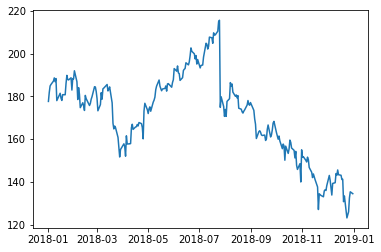

In [4]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

plt.plot(fb.index, fb.open)
plt.show()

* facebook의 prices의 데이터를 가지고와서 간단하게 시각화 시켜준 것이다. 
* x축은 fb.index를 사용하고, y축은 fb.open을 사용한다는 것을 알 수 있다. 

Since we are working in a Jupyter notebook, we can use the magic command `%matplotlib inline` once and not have to call `plt.show()` for each plot.

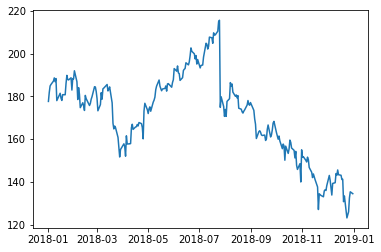

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)

* 여기서 추가적으로 하는 말은 %matplotlib inline을 해줘야 jupyter notebook에서 plot을 시각적으로 보이게 해준다는 것이다.

## Scatter plots

We can pass in a string specifying the style of the plot. This is of the form `[marker][linestyle][color]`. For example, we can make a black dashed line with `'--k'` or a red scatter plot with `'or'`:

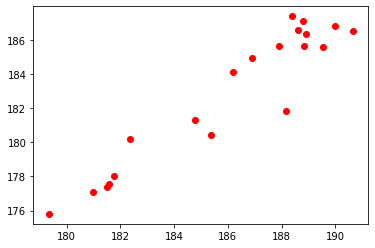

In [6]:
plt.plot('high', 'low', 'or', data=fb.head(20))

* 'or'이 linestyle component에 관한 것이다. 
* 아래 표에 보이듯이 표에 있는 것을 사용하여 다양한 것을 할 수 있다. 자세한 것을 보고 싶으면 [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)에 들어가서 보면된다.

Here are some examples of how you make a format string:

| Marker | Linestyle | Color | Format String | Result |
| :---: | :---: | :---: | :---: | --- |
| | `-` | `b` | `-b` | blue solid line|
| `.` |  | `k` | `.k` | black points|
|  | `--` | `r` | `--r` | red dashed line|
| `o` | `-` | `g` | `o-g` | green solid line with circles|
| | `:` | `m` | `:m` | magenta dotted line|
|`x` | `-.` | `c` | `x-.c` | cyan dot-dashed line with x's|
 
Note that we can also use format strings of the form `[color][marker][linestyle]`, but the parsing by `matplotlib` (in rare cases) might not be what we were aiming for. Consult the *Notes* section in the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) for the complete list of options.
## Histograms

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <a list of 10 Patch objects>)

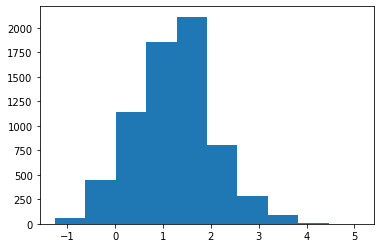

In [7]:
quakes = pd.read_csv('data/earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)

* magType이 ml인 것 중에 mag의 값들만 hist로 해서 plot을 그려준 것이다. 

### Bin size matters
Notice how our assumptions of the distribution of the data can change based on the number of bins (look at the drop between the two highest peaks on the righthand plot):

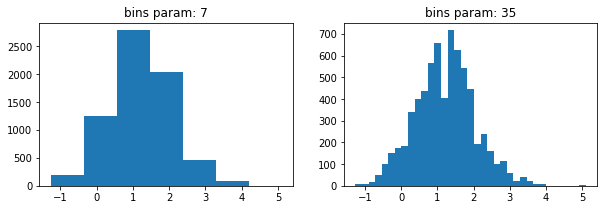

In [8]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')

* bin size가 7일 때와 bin size가 35일 때를 나누어서 보여주고 있다. 

## Plot components
### `Figure`
Top-level object that holds the other plot components.

In [9]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

* 처음에 figure object를 만들어 줄 때, plt.figure()를 사용해서 만들어 줄 수 있다.




### `Axes`
Individual plots contained within the `Figure`.

## Creating subplots
Simply specify the number of rows and columns to create:

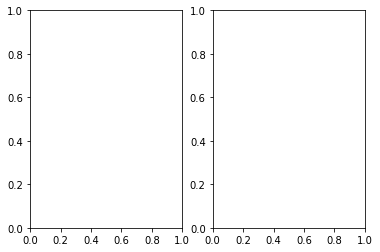

In [10]:
fig, axes = plt.subplots(1, 2)

* fig를 만들어 준다음에 제일 많이 사용하는 것이 subplots이고 여기에서 크기를 조절해 줄 수 있다. 
* 그리고 만든 사이즈를 1을 기준으로 해서 소수점으로 나누어주는 것을 볼 수 있다. 

As an alternative to using `plt.subplots()` we can add `Axes` objects to the `Figure` object on our own. This allows for some more complex layouts, such as picture in picture:

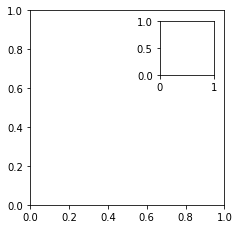

In [11]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

* 여기에서는 add_axes를 사용해서 추가적으로 plot을 그려주는 방법이 있다. 

## Creating Plot Layouts with `gridspec`
We can create subplots with varying sizes as well:

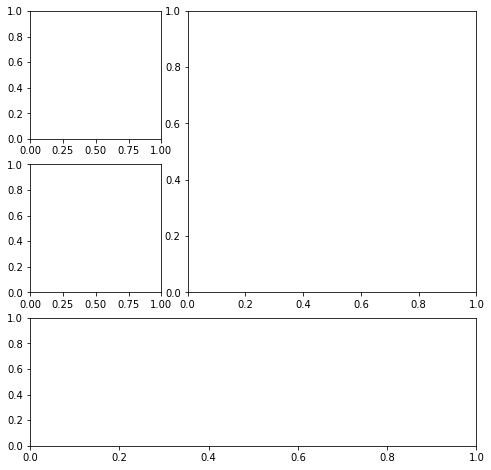

In [12]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])

* gridspec을 사용해서 plot의 구획을 그려서 구해주는 방법이 있다. 

## Saving plots
Use `plt.savefig()` to save the last created plot. To save a specific `Figure` object, use its `savefig()` method.

In [16]:
fig.savefig('empty.png')

* 그림을 저장하고 싶을 때 사용해준다. 

## Cleaning up
It's important to close resources when we are done with them. We use `plt.close()` to do so. If we pass in nothing, it will close the last plot, but we can pass in the specific `Figure` object to close or say `'all'` to close all `Figure` objects that are open. Let's close all the `Figure` objects that are open with `plt.close()`:

In [17]:
plt.close('all')

## Additional plotting options
### Specifying figure size
Just pass the `figsize` argument to `plt.figure()`. It's a tuple of `(width, height)`:

In [18]:
fig = plt.figure(figsize=(10, 4))

<Figure size 720x288 with 0 Axes>

This can be specified when creating subplots as well:

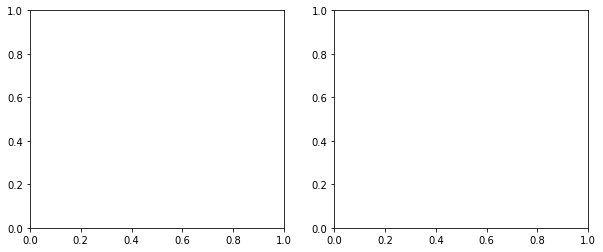

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

* figsize를 사전에 잡아주고 plot을 만들어 주게 되면, plot이 찌그러지지 않는것을 볼 수 있다. 

### `rcParams`
A small subset of all the available plot settings (shuffling to get a good variation of options):

In [20]:
import random
import matplotlib as mpl

rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # make this repeatable #random.seed(20)을 사용하여 랜덤하게 바뀌는 것을 고정해준다. 
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['animation.avconv_args',
 'axes.axisbelow',
 'axes.formatter.limits',
 'boxplot.capprops.color',
 'boxplot.meanprops.marker',
 'boxplot.whiskerprops.color',
 'figure.dpi',
 'image.interpolation',
 'lines.dash_joinstyle',
 'lines.markersize',
 'lines.solid_capstyle',
 'markers.fillstyle',
 'mpl_toolkits.legacy_colorbar',
 'savefig.transparent',
 'scatter.edgecolors',
 'text.latex.preview',
 'xtick.color',
 'xtick.labelbottom',
 'xtick.top',
 'ytick.major.right']

* 여기에서는 rcParams에 default parameter가 어떠한 것이 있는지 살펴본 것이다. 

We can check the current default `figsize` using `rcParams`:

In [21]:
mpl.rcParams['figure.figsize']

[6.0, 4.0]

We can also update this value to change the default (until the kernel is restarted):

In [22]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

* default값을 (300, 10)으로 바꾸어주게 되면 plot을 그릴 때 계속해서 바꾸어준 값으로 plot을 그려주게 된다.

Use `rcdefaults()` to restore the defaults. Note this is slightly different than before because running `%matplotlib inline` sets a different value for `figsize` ([see more](https://github.com/ipython/ipykernel/blob/master/ipykernel/pylab/config.py#L42-L56)). After we reset, we are going back to the default value of `figsize` before that import:

In [24]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

* 초기의 값인 default값을 사용하고 싶을 때는 rcdefaults를 사용해서 reset을 해줄 수 있다. 

This can also be done via `pyplot`:

In [25]:
plt.rc('figure', figsize=(20, 20)) # change `figsize` default to (20, 20)
plt.rcdefaults() # reset the default

* plt.rc의 default값을 변경해주고 싶을 때, plt.rc('figure', figsize=(20, 20))를 사용해서 default값을 바꾸어 줄 수 있다는 것도 알 수 있다.  

<hr>
<div>
    <a href="../ch_04/4-time_series.ipynb">
        <button>&#8592; Chapter 4</button>
    </a>
    <a href="./2-plotting_with_pandas.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<hr>